In [1]:
# imports
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#sklearn's neighbor-based learning
from sklearn import neighbors

In [3]:
# working with distances and features on different scales - important to standardize
from sklearn.preprocessing import StandardScaler

### sklearn's pipeline 
Sequentially apply a list of transforms and a final estimator.  
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters

In [4]:
from sklearn.pipeline import make_pipeline

In [5]:
# change the font size
import matplotlib as mpl
mpl.rcParams.update({'font.size': 20}) # respect

In [26]:
# set the random seed for reproducible result
np.random.seed(12346)

In [27]:
# make the data
# horse
numpts_H = 50  
horse_weight = np.random.rand(numpts_H, 1) * 1500.0 + 400.0     # 400 - 1900 lbs, uniform dist
horse_height = horse_weight/370 + np.random.normal(0, 0.5, horse_weight.shape) + 2  # ft, normal dist

# dog
numpts_D = 30
dog_weight = np.random.rand(numpts_D, 1) * 800.0 + 10.0      # 10 - 900 lbs, uniform dist
dog_height = dog_weight/300 + np.random.normal(0, 0.5, dog_weight.shape) + 1  # ft

# make features array
X_horse = np.hstack((horse_weight, horse_height))
X_dog = np.hstack((dog_weight, dog_height))
X = np.vstack((X_horse, X_dog))

# target -  horses are 0, dogs are 1
y = np.vstack((np.zeros(horse_weight.shape),np.ones(dog_weight.shape)))

# print out all the shapes to make sure it's all consistent
print("First 3 rows of X_horse")
print(X_horse[:3,:])
print("X_horse shape: {0}".format(X_horse.shape))

print("\nFirst 3 rows of X_dog")
print(X_dog[:3,:])
print("X_dog shape: {0}".format(X_dog.shape))

print("\nX shape: {0}".format(X.shape))
print("y shape: {0}\n".format(y.shape))

First 3 rows of X_horse
[[ 1793.49583287     6.2055549 ]
 [ 1073.74863115     5.14100357]
 [  742.47298283     4.65290725]]
X_horse shape: (50, 2)

First 3 rows of X_dog
[[ 259.274282      1.43093886]
 [ 478.17623174    2.45651686]
 [ 223.89081889    1.10320706]]
X_dog shape: (30, 2)

X shape: (80, 2)
y shape: (80, 1)



In [28]:
# helper for prediction marker color
# horses are 0, dogs are 1

def color_prediction_by_class(val, c_horse='r', c_dog='b'):
    return c_horse if val == 0 else c_dog

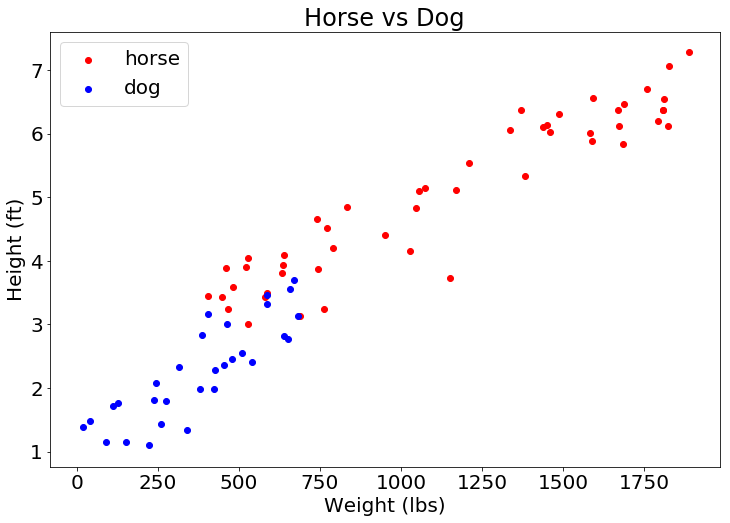

In [29]:
# plot the data
def plot_data(X_horse, X_dog, c_horse, c_dog, X_pred=None, y_pred=None, c_pred=None, text=None):
    ''' plots horse, dog data and predictions if provided'''
    fig = plt.figure(figsize = (12,8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X_horse[:, 0], X_horse[:, 1], c=c_horse, label = 'horse')
    ax.scatter(X_dog[:, 0], X_dog[:, 1], c=c_dog, label = 'dog')
    if X_pred is not None:
        ax.scatter(X_pred[:, 0], X_pred[:, 1], marker = 'x', s = 150, c=c_pred, label='prediction')
        if text:
            ax.text(0, 5.75, text) # text at x, y
    ax.set_title("Horse vs Dog")
    ax.set_xlabel("Weight (lbs)")
    ax.set_ylabel("Height (ft)")
    plt.legend();
    #plt.grid();

c_horse, c_dog ='r', 'b'    
plot_data(X_horse, X_dog, c_horse, c_dog)

### Investigate classification of one new datapoint using the entire data set for training

In [30]:
# set value of new point of interest
# will it be a horse or a dog?
weight_p = 650.0 # lbs
height_p = 3  # ft

X_p = np.array([weight_p, height_p]).reshape(1, 2)
print(X_p)

[[ 650.    3.]]


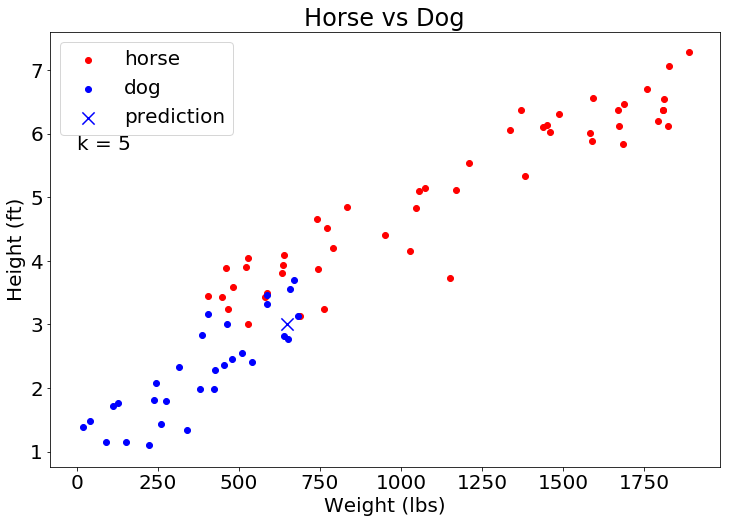

In [31]:
# set k
k = 5 # how many neighbors should the new datapoints classification be based on?

# fit - use StandardScaler because we'd like to weight each feature 
# similarly in the distance calculation
model = neighbors.KNeighborsClassifier(n_neighbors=k) # but see other hyperparameters!
knn = make_pipeline(StandardScaler(), model)  # a transform, followed by a model that can be fit
knn.fit(X, y.ravel()) # ravel because requires 1D array
y_p = knn.predict(X_p).reshape(1,1)

# color of prediction
c_p = np.apply_along_axis(color_prediction_by_class, 1, y_p)

#plot the prediction
txt = "k = " + str(k)
plot_data(X_horse, X_dog, c_horse, c_dog, X_p, y_p, c_p, txt)

### For different values of k, visualize the decision boundaries between horse and dog
Colors defined in [hexidecimal.](https://www.w3schools.com/colors/colors_hexadecimal.asp)

In [32]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

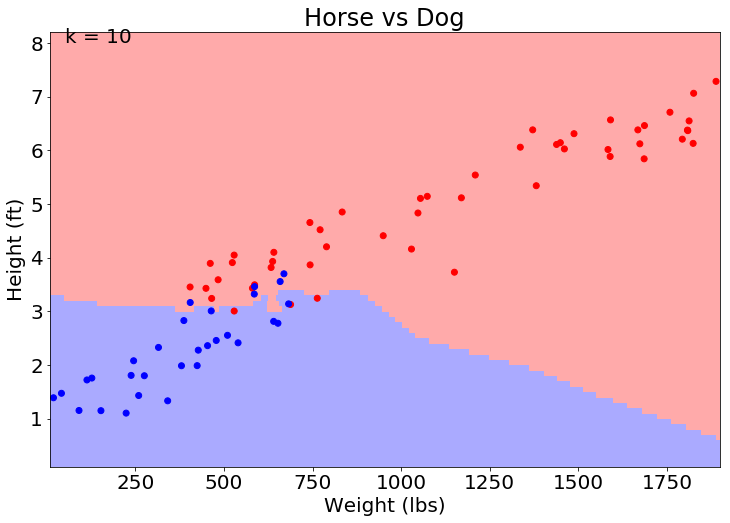

In [39]:
# plot decision boundaries with different complexities
# set k
k = 10

# fit
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
clf = make_pipeline(StandardScaler(), clf) # comment this out to make a point about scaling
clf.fit(X, y.ravel()) # ravel because requires 1D array

# make mesh predictions
hx, hy = 0.1, 0.1 # step size of mesh
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                     np.arange(y_min, y_max, hy))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# old style
plt.figure(figsize = (12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.text(50, 8, "k = " + str(k))
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)");

### So if you were trying to make the best model possible, how would you pick your value of k?
Cross-validation!

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
# just to be safe, shuffle the arrays
permutation = np.random.permutation(X.shape[0])
X_s, y_s = X[permutation], y[permutation]
print("Original\t\t\tShuffled")
print("weight\theight\tlabel\t\tweight\theight\tlabel")
for row in range(10):
    print("{0:0.1f}\t{1:0.1f}\t{2}\t\t{3:0.1f}\t{4:0.1f}\t{5}".format(
            X[row,0],X[row,1],y[row][0],X_s[row,0],X_s[row,1],y_s[row][0]))

Original			Shuffled
weight	height	label		weight	height	label
1793.5	6.2	0.0		461.3	3.9	0.0
1073.7	5.1	0.0		528.7	4.0	0.0
742.5	4.7	0.0		585.5	3.3	1.0
1460.7	6.0	0.0		1673.6	6.1	0.0
687.9	3.1	0.0		341.1	1.3	1.0
1685.8	5.8	0.0		427.4	2.3	1.0
1170.0	5.1	0.0		1809.0	6.4	0.0
528.7	4.0	0.0		127.1	1.8	1.0
789.4	4.2	0.0		1824.1	6.1	0.0
1047.4	4.8	0.0		275.3	1.8	1.0


In [42]:
'''see \t as to separate items according to tabs'''

'see \t as to separate items according to tabs'

k	accuracy
1	0.900
2	0.900
3	0.863
4	0.850
5	0.900
6	0.887
7	0.887
8	0.887
9	0.900
10	0.900
11	0.900
12	0.925
13	0.912
14	0.912
15	0.912
16	0.925
17	0.912
18	0.925
19	0.912


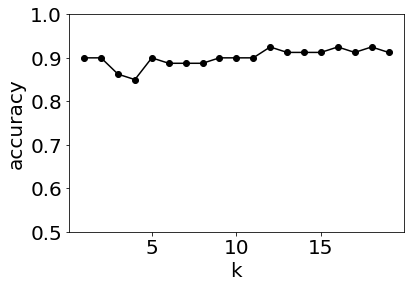

In [43]:
ks, accuracies = [], []
for k in range(1, 20, 1):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn = make_pipeline(StandardScaler(), model)
    cv_accuracies = cross_val_score(knn, X_s, y_s.ravel(), cv=5, scoring='accuracy', n_jobs=-1)
    ks.append(k)
    accuracies.append(np.mean(cv_accuracies))

print("k\taccuracy")
for k, acc in zip(ks, accuracies):
    print("{0}\t{1:0.3f}".format(k, acc))

# quick plot
plt.plot(ks, accuracies, 'ko-')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.ylim([0.5,1]);